In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import tqdm

In [3]:
# # !git clone https://github.com/Ner-Ber/OFC.git
# %cd /content/OFC
# !git pull https://github.com/Ner-Ber/OFC.git

In [4]:
# from OFC.src import grid
sys.path.append('/mnt/g/My Drive/Projects/OFC/src')
import grid

In [5]:
import importlib
importlib.reload(grid)

<module 'grid' from '/mnt/g/My Drive/Projects/OFC/src/grid.py'>

In [61]:
sys.path.append('/mnt/g/My Drive/Projects/OFC/src')
import grid
import grid_updaters
import output_statistics

In [67]:
import importlib
importlib.reload(grid)
importlib.reload(grid_updaters)


<module 'grid_updaters' from '/mnt/g/My Drive/Projects/OFC/src/grid_updaters.py'>

In [68]:
# try_grid = grid.NNCoulombFrictionGrid(
try_grid = grid.NNCoulombFrictionCountTime(
    f_s=10,
	increment=0.01,
	alpha=0.2,
	n=512,
	m=512,
	boundary_size=2,
	save_every=3,
)
try_grid.run(10000, transient_steps=10000, progress=True)

In [ ]:
avalanche_summary = try_grid.observables_df()

In [ ]:
avalanche_summary

,dt,number_of_iterations,avalanche_size,number_of_releases
0,100.000270,1,4.0,1.0
1,0.243156,1,4.0,1.0
2,0.179476,3,10.0,3.0
3,0.206861,1,4.0,1.0
4,0.034509,1,4.0,1.0
...,...,...,...,...
4995,0.055332,1,4.0,1.0
4996,0.006908,1,4.0,1.0
4997,0.060856,2,8.0,2.0
4998,0.019670,1,4.0,1.0


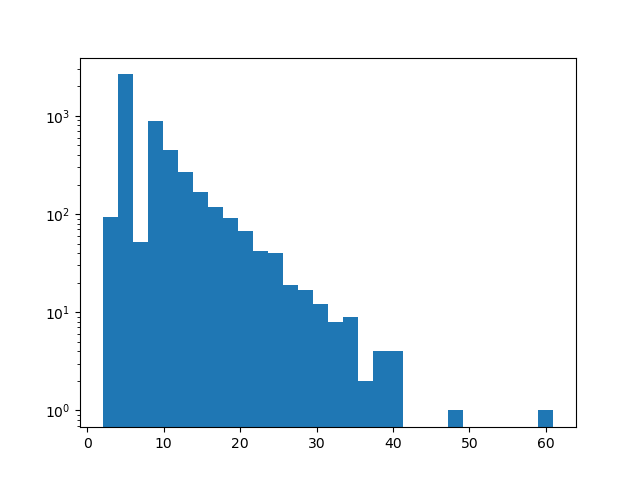

In [ ]:
plt.figure()
_ = plt.hist(avalanche_summary.avalanche_size.values, 30)
plt.yscale('log')

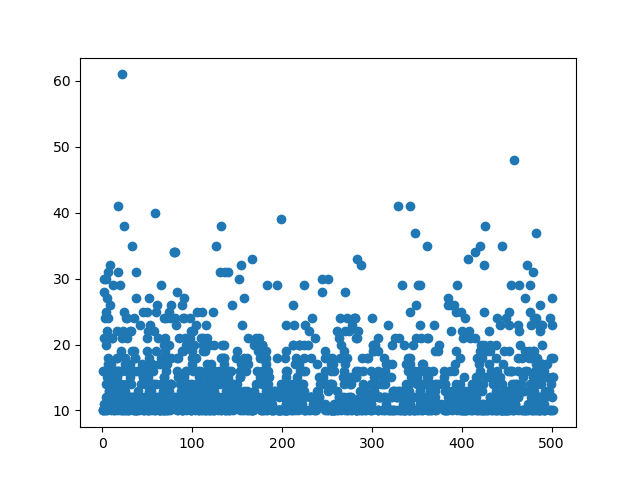

In [ ]:
%matplotlib widget
plt.figure()
mc = 10
real_time = np.cumsum(avalanche_summary.dt.values)
real_time -= real_time[0]
magnitude = avalanche_summary.avalanche_size.values
mc_logical = avalanche_summary.avalanche_size.values>=mc
plt.scatter(real_time[mc_logical], magnitude[mc_logical])

In [ ]:
real_time

array([0.00000000e+00, 2.43155550e-01, 4.22631411e-01, ...,
       5.02334093e+02, 5.02353762e+02, 5.02362307e+02])

In [ ]:
#@title calculate event rate
time_window = 10
time_evals = np.arange(0, real_time.max(), 5)
end_time = np.searchsorted(real_time, time_evals, side='left')
start_time = np.searchsorted(real_time, time_evals-time_window, side='right')
event_rate = []
for p in zip(start_time, end_time):
    event_rate.append(magnitude[slice(p[0], p[1])].size)
event_rate = np.array(event_rate)
event_rate

array([  0,  41,  78,  78,  86,  97, 106, 102,  96,  96,  88,  93,  93,
        84,  88,  98,  94,  85,  87,  93,  91,  91,  95,  83,  81,  97,
        98,  84,  84,  88,  70,  71,  89,  83,  82,  78,  79,  86,  76,
        80,  98, 105,  94,  87,  94,  94,  96,  99,  95,  93,  95,  97,
        95,  91,  89,  95,  94,  96, 101,  92,  86,  90, 104, 112, 107,
        99, 102,  97, 107, 135, 136, 108,  96, 115, 121, 109,  85,  93,
       111, 109, 102,  98, 102, 108, 115, 116, 117, 117, 135, 120, 104,
       126, 133, 123, 112, 109, 124, 134, 128, 130, 124])

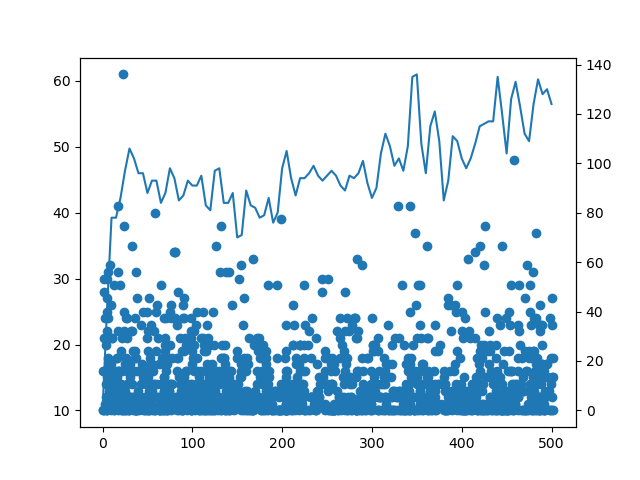

In [ ]:
f, ax = plt.subplots()
ax.scatter(real_time[mc_logical], magnitude[mc_logical])
ax2 = ax.twinx()
ax2.plot(time_evals, event_rate)

In [ ]:
np.arange(15)[slice([4, 4], [7,10])]

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
real_dt_mc = np.diff(real_time[mc_logical])

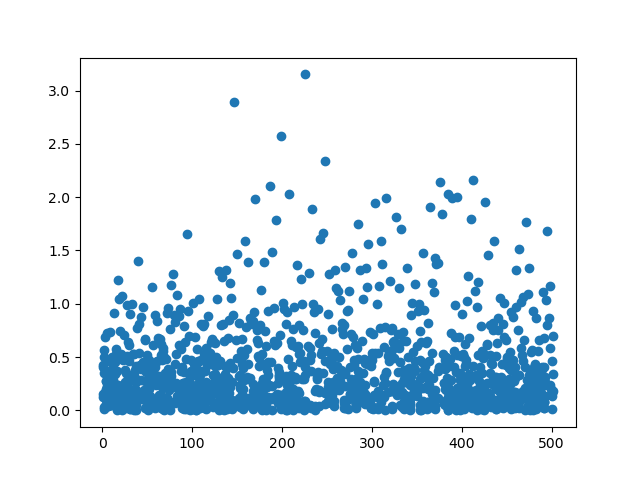

In [ ]:
plt.figure()
plt.scatter(real_time[mc_logical][:-1], real_dt_mc)

In [ ]:
observable = avalanche_summary['number_of_iterations'].values

In [ ]:
(observable!=0).sum()

4979

In [ ]:
np.argwhere(observable!=0).ravel()

array([  20,   21,   22, ..., 4997, 4998, 4999])